# 문제1. DataFrame Index

#### (1) 아래 코드를 실행하고, df에 ['진수','상연','언지','수진','본인이름']으로 구성된 '이름'열을 생성해주세요.

In [2]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df=titanic.loc[0:4,'survived':'age']
df

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [3]:
df['이름']=['진수','상연','언지','수진','현우']
df

,survived,pclass,sex,age,이름
0,0,3,male,22.0,진수
1,1,1,female,38.0,상연
2,1,3,female,26.0,언지
3,1,1,female,35.0,수진
4,0,3,male,35.0,현우


#### (2) '이름' 열을 Index로하는 DataFrame ndf를 생성해주세요.

In [4]:
ndf=df.set_index(['이름'])
ndf

,survived,pclass,sex,age
이름,,,,
진수,0,3,male,22.0
상연,1,1,female,38.0
언지,1,3,female,26.0
수진,1,1,female,35.0
현우,0,3,male,35.0


# 문제2.  데이터프레임 핸들링

#### (1) diamonds 데이터를 dia로 불러와 데이터를 확인 후, 다이아몬드의 투명도('clarity'), 품질('cut')에 따른 평균 가격('price'을 나타낸  피벗테이블을 dia2로 나타내주세요.

In [5]:
import pandas as pd
dia = pd.read_csv("diamonds.csv")
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
dia2=pd.pivot_table(dia, index='clarity', columns='cut', values='price', aggfunc='mean')
dia2.head()

cut,Fair,Good,Ideal,Premium,Very Good
clarity,,,,,
I1,3703.533333,3596.635417,4335.726027,3947.331707,4078.226190
IF,1912.333333,4098.323944,2272.913366,3856.143478,4396.216418
SI1,4208.279412,3689.533333,3752.118169,4455.269371,3932.391049
SI2,5173.916309,4580.260870,4755.952656,5545.936928,4988.688095
VS1,4165.141176,3801.445988,3489.744497,4485.462041,3805.353239


#### (2) dia자료에서 'cut', 'x', 'y', 'z'를 선택해 dia3로 저장 후 'cut'을 행 인덱스로 설정한 후 상자그림을 그려주세요.

In [7]:
dia3=pd.DataFrame(dia[['cut','x','y','z']])

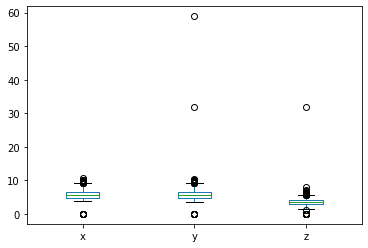

In [8]:
dia3.set_index(['cut'], inplace=True)
dia3.plot(kind='box')

# 문제3. 데이터 사전 처리

* 서울특별시 공공자전거 이용정보(월별)_201907_일부.xlsx   파일을 사용합니다
 (출처 : 서울시 열린데이터 광장)

아래 코드를 실행시켜주세요!

In [9]:
import pandas as pd

bicycle = pd.read_excel("서울특별시 공공자전거 이용정보(월별)_201907_일부.xlsx")
bicycle['대여소번호'] = bicycle['대여소번호'].astype('category')
bicycle['대여구분코드'] = bicycle['대여구분코드'].astype('category')
bicycle['연령대코드'] = bicycle['연령대코드'].astype('category')

bicycle.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2019-07-01,3,중랑센터,일일(회원),M,AGE_003,6,199.86,1.68,7210,87
1,2019-07-01,3,중랑센터,일일(회원),M,AGE_004,1,0.00,0.00,0,2
2,2019-07-01,3,중랑센터,일일(회원),M,AGE_005,22,14419.28,129.96,560190,1329
3,2019-07-01,3,중랑센터,정기,M,AGE_005,13,308.65,2.86,12370,155
4,2019-07-01,5,상암센터 정비실,일일(회원),M,AGE_005,1,34.47,0.30,1280,6


#### (1) 연속변수 이동거리(M)를 

2개 구간에 할당하여 'bin_dividers' 리스트에 넣고

각 구간의 이름 (short/long)을 'bin_names' 리스트에 넣어 

이들을 활용해 이동거리(M)을 2개의 구간으로 나눈 'distance'에 저장하세요.

( include_lowest = True )로 지정

In [10]:
import numpy as np

In [11]:
count, bin_dividers=np.histogram(bicycle['이동거리(M)'], bins=2)

In [12]:
bin_names=['short','long']

In [13]:
bicycle['distance']=pd.cut(x=bicycle['이동거리(M)'], bins=bin_dividers, labels=bin_names, include_lowest=True)
bicycle[['이동거리(M)','distance']].head()

,이동거리(M),distance
0,7210,short
1,0,short
2,560190,long
3,12370,short
4,1280,short


#### (2) '대여구분코드'의 dummy 변수를 생성한 후, 기존의 데이터프레임과 연결(concat)하고 기존의 '대여구분코드'열을 제거해주세요.

In [14]:
a=pd.get_dummies(bicycle['대여구분코드'])
bicycle=pd.concat([bicycle, a], axis=1)
bicycle.drop(['대여구분코드'], axis=1, inplace=True)
bicycle.head()

,대여일자,대여소번호,대여소,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),distance,일일(회원),정기
0,2019-07-01,3,중랑센터,M,AGE_003,6,199.86,1.68,7210,87,short,1,0
1,2019-07-01,3,중랑센터,M,AGE_004,1,0.00,0.00,0,2,short,1,0
2,2019-07-01,3,중랑센터,M,AGE_005,22,14419.28,129.96,560190,1329,long,1,0
3,2019-07-01,3,중랑센터,M,AGE_005,13,308.65,2.86,12370,155,short,0,1
4,2019-07-01,5,상암센터 정비실,M,AGE_005,1,34.47,0.30,1280,6,short,1,0


# 문제4. 데이터프레임 응용
* stock price 파일과 stock valuation 파일을 이용하는 문제입니다. 데이터를 불러와주세요

#### (1) 두 파일에는 공통으로 존재하는 주식 종목을 결합한 데이터프레임을 만들어주세요. 

id를 중심으로 결합된 데이터프레임(adf)를 만들어주세요

In [15]:
import numpy as np
import pandas as pd
df1 = pd.read_excel('stock price.xlsx')
df2 = pd.read_excel('stock valuation.xlsx')

In [16]:
abf=pd.merge(df1, df2, on='id')
abf

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


#### (2) adf 데이터프레임을 이용해 시가총액(value)이 10000 이상인 기업들의 주가(price), 주가수익비율(per), 주가자산비율(pbr)의 표준편차를 구하세요

In [17]:
Nabf=abf[abf['value']>=1000]
print(Nabf['price'].std())
print(Nabf['per'].std())
print(Nabf['pbr'].std())

91108.0505498828
11.489992910118012
0.7993112910862892


#### (3) adf 데이터프레임을 사용합니다.

주가수익비율(per)은 주가(price)에서 주당순이익(eps)을 나눠서 계산합니다.

예시) per = price/eps

 3-1) 기존의 per열은 삭제한 후 새롭게 per_new열을 price와 eps 를 사용해 추가해주세요

 3-2) per_new값이 15 이상인 기업은 고평가 15미만인 기업은 저평가를 나타내주는 per_value 열을 만들어주세요 (단, lambda와 apply를 사용해주세요)



In [36]:
abf['per_new']=abf['price']/abf['eps']
abf.drop(['per'], axis=1, inplace=True)

In [38]:
abf['per_value']=abf['per_new'].apply(lambda x: '고평가' if x>15 else '저평가')